### 중고차 블로그 워드 클라우드

In [ ]:
!pip install wordcloud

In [ ]:
!pip install konlpy

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt,Komoran
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
blog_data = pd.read_csv('data//blog.csv',encoding='cp949',index_col=0)
blog_data.head()

,idx,title,body
0,145,중고차 구매하기전 침수차 구별하는 방법,침수차 구별법 반드시 체크해야할 사항은?안녕하세요!건준오토모빌침수차는 차체에 녹이 ...
1,146,BMW 320d ed 연비 좋은 가성비 중고차 추천 합니다.,"안녕하세요? 카프렌즈 입니다.이번에 소개 시켜 드릴 차량은 가성비, 연비 모두 좋고..."
2,147,경차 모닝 마티즈도 비대면 중고차 거래도 카프렌즈에 문의 주세요~,"안녕하세요? 카프렌즈 입니다.오늘은 비가 굉장히 많이 내리네요!어제, 오늘 경차 출..."
3,148,중고차 전문가와 알아보는 중고차 허위매물 거르는 꿀팁!,중고차 허위매물 사기 사례가 기승을 부리고 있습니다. 아무리 꼼꼼하게 확인하고 알아...
4,149,엔카 비교견적에서 쉽게 알아보는 중고차가격,오랜 시간 동안 와이프의 발걸음이 되어준 고마운 차량입니다. 하지만 이젠 아이가 점...


In [3]:
data = blog_data['title'].values + blog_data['body'].values

In [12]:
data = list(data)

In [15]:
data = data[11:]

94


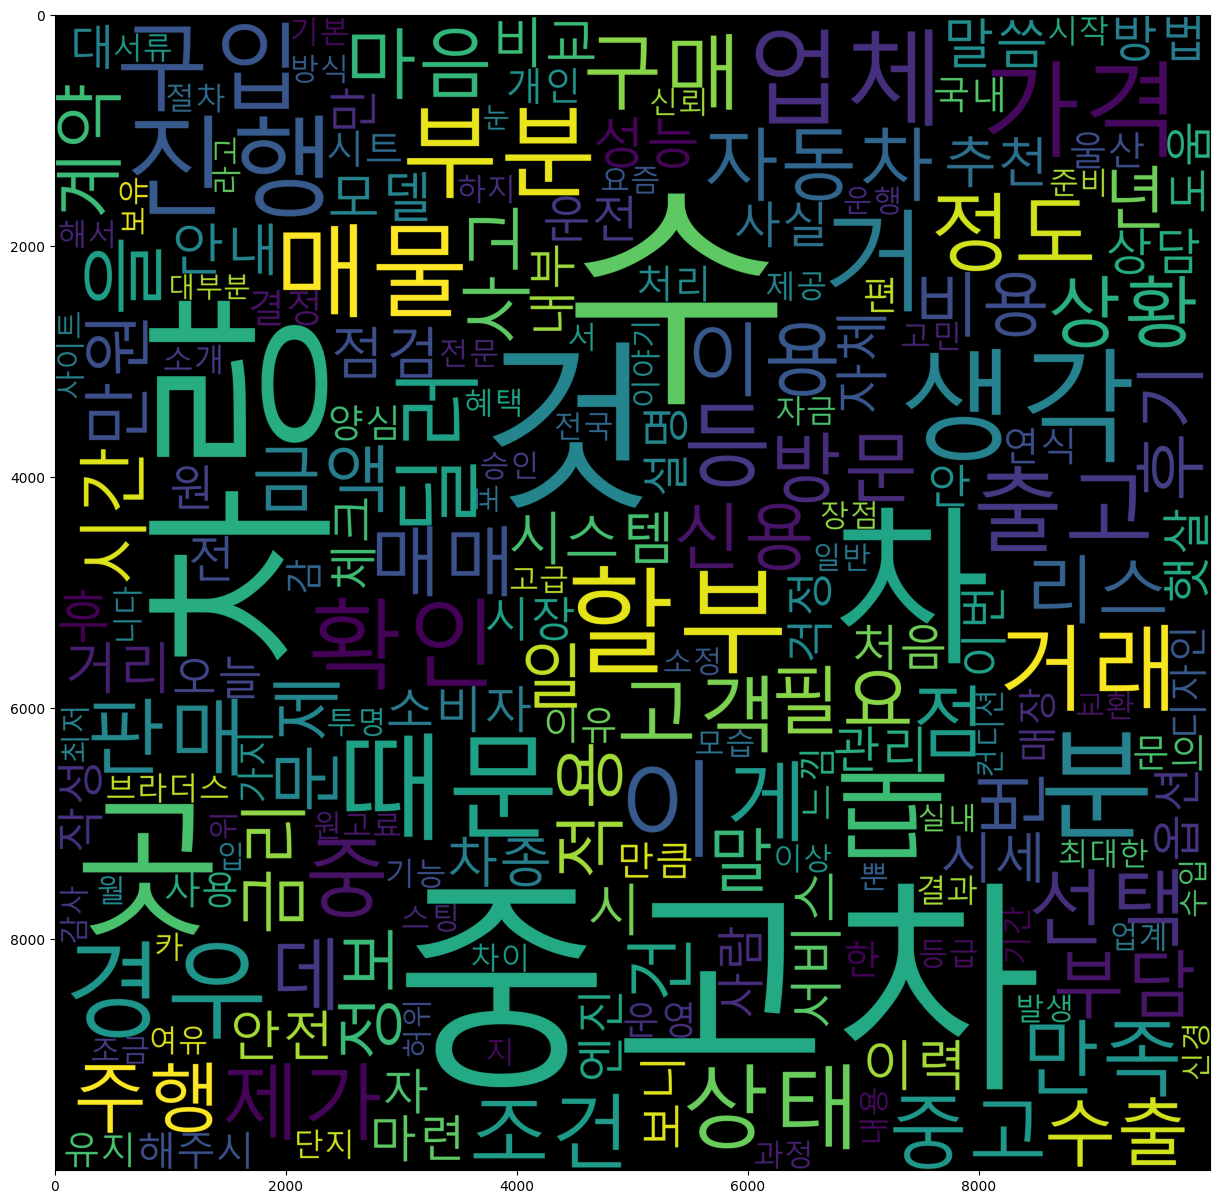

In [32]:
words = []
komoran = Komoran()
for idx,title_body in enumerate(data):
    try:
        nouns = komoran.nouns(title_body)
        words.extend(nouns)
    except:
        print(idx)
        pass

wCloud = Counter(words)

wc = WordCloud(font_path='malgun', width=2000, height=2000, scale=5.0, max_font_size=400)
gen = wc.generate_from_frequencies(wCloud)
plt.figure(figsize=(15,15))
plt.imshow(gen)